In [113]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from math import e
j = cmath.sqrt(-1)

In [3]:
#operator definitionis
N=2
si = qeye(2)
sx = 0.5*sigmax()
sy = 0.5*sigmay()
sz = 0.5*sigmaz()

In [4]:
#make list of tensor products
sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))
print(sz_list[0])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]


In [5]:
#construct Hamiltonian
B = 0
A0 = 1
H = B*sz_list[0] 
for n in range(N-1):
    H += A0*sz_list[0]*sz_list[n+1] + A0*sx_list[0]*sx_list[n+1] + A0*sy_list[0]*sy_list[n+1]
print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]


In [6]:
#Find eigenvalues and eigenvectors
ebasis = H.eigenstates()[1]
eng = H.eigenstates()[0]
H.eigenstates()

(array([-0.75,  0.25,  0.25,  0.25]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.70710678]
  [-0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.        ]
  [0.70710678]
  [0.70710678]
  [0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]], dtype=object))

In [7]:
#Create initial state
psi0 = basis(2**N,1)
psi0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [256]:
#Evolution
steps = 50
t = np.arange(steps)
result = sesolve(H, psi0, t, [sz_list[0]])

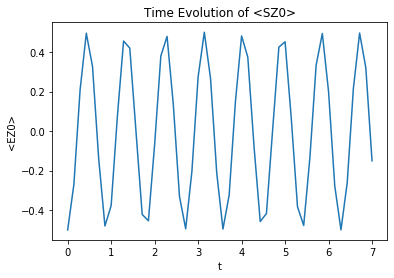

In [257]:
plt.plot(times, result.expect[0])
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<EZ0>")
plt.xlabel("t")
plt.show()

In [258]:
N=2
#given N finds values of s (highest weight) and ms
s = (N-1)/2
m = -s
ms = [m]
for i in range(N):
    if m < s:
        m = m + 1
        ms.append(m)
print(s)
print(ms)

0.5
[-0.5, 0.5]


In [259]:
#function to give eigenvectors of the 2by2 block for a given s and m (take lowest value of m)
def generalBlock(s,m):
    g = math.sqrt(s*(s+1)-m*(m+1))
    BlockGen = np.array([[0.5*B + 0.5*A0*m, 0.5*A0*g],[0.5*A0*g,-0.5*B - 0.5*A0*(m+1)]])
    Block = Qobj(BlockGen)
    return Block.eigenstates()
generalBlock(s,-1)

(array([-0.75,  0.25]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.8660254]
  [ 0.5      ]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.5      ]
  [-0.8660254]]], dtype=object))

In [260]:
#Make list of eigenvalues in 
E = []
numStates = int(2*(2*s+1))
for i in range(numStates):
        if i%2:
            E.append(generalBlock(s,s)[0][1])
        else:
            E.append(generalBlock(s,s)[0][0])
E[0] = generalBlock(s,s)[0][1]
E[numStates-1] = generalBlock(s,s)[0][1]

coefAllUp = Qobj([[0],[1]])
coefAllDown = Qobj([[1],[0]])
Coef = [coefAllUp] 
for i in range(len(ms)-1): 
    x = len(ms)-2-i
    Coef.append(generalBlock(s,ms[x])[1][1]) 
    Coef.append(generalBlock(s,ms[x])[1][0]) 
Coef.append(coefAllDown)
print(E)
print((Coef))
print(len(Coef))

[0.25, 0.25, -0.75, 0.25]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]]
4


In [261]:
#Initial State (in |s,ms,s0> basis)
#basis labeled by |s,s,up>, |s,s-1,up>, |s,s,down>, |s,s-2,up, .. |s,-s,down>
psi0 = basis(numStates,2)
psi0 #is state |s,s-1,up>

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [262]:
#Change of basis matrix
ChangeEl = np.zeros((numStates,numStates), dtype=complex)
ChangeEl[0][0] = 1
ChangeEl[numStates-1][numStates-1] = 1
#assign coeff 
for i in range(numStates-2):
    if i%2 == 0:
        ChangeEl[i+1][i+1] = Coef[i+1][0]
        ChangeEl[i+2][i+1] = Coef[i+2][0]
    if i%2 == 1:
        ChangeEl[i][i+1] = Coef[i][1]
        ChangeEl[i+1][i+1] = Coef[i+1][1]
ChangeOfB = Qobj(ChangeEl)
ChangeOfB

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]

In [263]:
#Change initial state to |j,mj> basis
psi0J = ChangeOfB*psi0
psi0J

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

In [264]:
#Time Evolution of initial state
steps = 50
tCoeffStep = np.zeros(numStates, dtype=Qobj)
psiT = []
exp = 0
for k in range(steps):
    for i in range(numStates):
        exp = e**(-j*E[i]*t[k])
        tCoeffStep[i] = psi0J[i]*exp
    psiTi = Qobj(tCoeffStep)
    psiT.append(psiTi)

In [265]:
#bra of |psiT>
CpsiT = []
for i in range(steps):
    CpsiTi = psiT[i].dag()
    CpsiT.append(CpsiTi)

In [266]:
#Check normalization
print(CpsiT[2]*psiT[2])

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]


In [267]:
#Define S0z in |s,ms,s0> basis
S0z = np.zeros((numStates,numStates))
S0z[0][0] = 1
S0z[numStates-1][numStates-1] = 1
for i in range(numStates-2):
    if i%2 == 0:
        S0z[i+1][i+1] = 1
    if i%2 == 1:
        S0z[i+1][i+1] = -1
S0zs = Qobj(S0z)
S0zs

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]

In [268]:
#Change S0z to |j,mj> basis
S0zj = (ChangeOfB.dag())*S0zs*ChangeOfB
S0zj

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

In [269]:
#expectation value of SZ0
S0zT = np.zeros(steps, dtype = complex)
for i in range(steps):
    S0zTi = CpsiT[i]*S0zj*psiT[i]
    S0zT[i] = (S0zTi[0][0])
    print(S0zTi)    

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-1.]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.54030231]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.41614684]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.9899925]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.65364362]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.28366219]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.96017029]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.75390225]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.14550003]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.91113026]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.83907153]]
Quantum object: dims = [[

C:\Users\aorfi\Anaconda3\envs\qutip-env\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


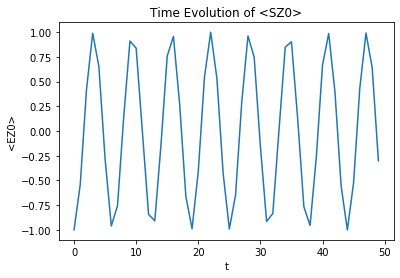

In [270]:
plt.plot(t,S0zT)
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<EZ0>")
plt.xlabel("t")
plt.show()